## Plotting the Decision Boundaries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score
from sklearn.model_selection import train_test_split


training_data = pd.read_csv('./Datasets/wildfires_training.csv')
test_data = pd.read_csv('./Datasets/wildfires_test.csv')

X_train = training_data.drop('fire', axis=1)  # Features (everything except "fire")
y_train = training_data['fire']   

X_test = test_data.drop('fire', axis=1)  # Featuåres (everything except "fire")
y_test = test_data['fire']               # Target variable (What I want to predict "fire" column)

/var/folders/bm/kvw7rp0j03g4sdyldy68g73w0000gn/T/ipykernel_95673/2911032865.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


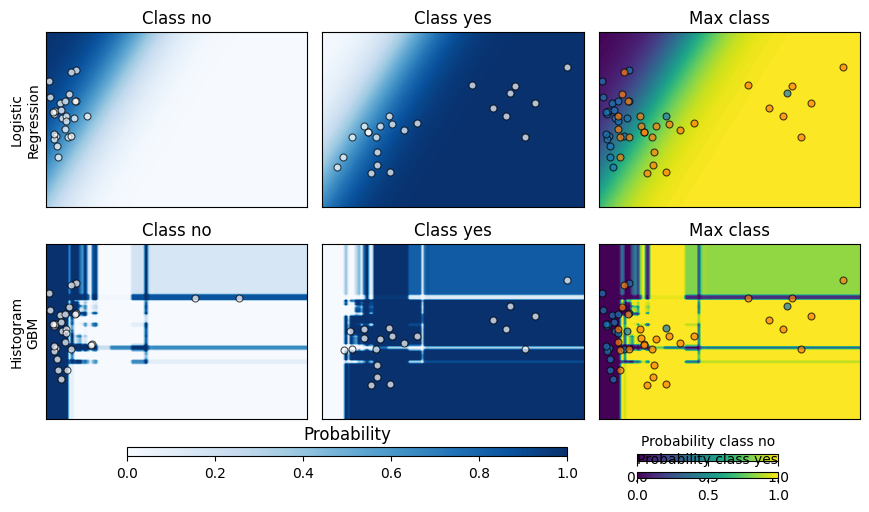

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, log_loss
from matplotlib import cm

#Project data into 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Define classifiers
classifiers = {
    "Logistic\nRegression": LogisticRegression(max_iter=250, C=3),
    "Histogram\nGBM": HistGradientBoostingClassifier(learning_rate=1.0, min_samples_leaf=23),
}

n_classifiers = len(classifiers)
scatter_kwargs = {
    "s": 25,
    "marker": "o",
    "linewidths": 0.8,
    "edgecolor": "k",
    "alpha": 0.7,
}

y_unique = np.unique(y_train)
n_classes = len(y_unique)

# Create figure and axes
fig, axes = plt.subplots(
    nrows=n_classifiers,
    ncols=n_classes + 1,
    figsize=(4 * 2.2, n_classifiers * 2.2),
)

evaluation_results = []
levels = 100

# Train classifiers and visualize decision boundaries
for classifier_idx, (name, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train_2d, y_train).predict(X_test_2d)
    y_pred_proba = classifier.predict_proba(X_test_2d)
    accuracy_test = accuracy_score(y_test, y_pred)
    log_loss_test = log_loss(y_test, y_pred_proba)

    evaluation_results.append({
        "name": name.replace("\n", " "),
        "accuracy": accuracy_test,
        "log_loss": log_loss_test,
    })

    for label in y_unique:
        label_idx = np.where(y_unique == label)[0][0]
        disp = DecisionBoundaryDisplay.from_estimator(
            classifier,
            X_train_2d,
            response_method="predict_proba",
            class_of_interest=label,
            ax=axes[classifier_idx, label_idx],
            vmin=0,
            vmax=1,
            cmap="Blues",
            levels=levels,
        )

        axes[classifier_idx, label_idx].set_title(f"Class {label}")
        mask_y_pred = y_pred == label
        axes[classifier_idx, label_idx].scatter(
            X_test_2d[mask_y_pred, 0],
            X_test_2d[mask_y_pred, 1],
            c="w",
            **scatter_kwargs,
        )
        axes[classifier_idx, label_idx].set(xticks=(), yticks=())
        
    max_class_disp = DecisionBoundaryDisplay.from_estimator(
        classifier,
        X_train_2d,
        response_method="predict_proba",
        class_of_interest=None,
        ax=axes[classifier_idx, len(y_unique)],
        vmin=0,
        vmax=1,
        levels=levels,
    )
    for label in y_unique:
        mask_label = y_test == label
        axes[classifier_idx, len(y_unique)].scatter(
            X_test_2d[mask_label, 0],
            X_test_2d[mask_label, 1],
            #c=max_class_disp.multiclass_colors_[[label], :],
            **scatter_kwargs,
        )

    axes[classifier_idx, len(y_unique)].set(xticks=(), yticks=())
    axes[classifier_idx, len(y_unique)].set_title("Max class")
    axes[classifier_idx, 0].set_ylabel(name)

ax_single = fig.add_axes([0.15, -0.05, 0.5, 0.02])
plt.title("Probability")
_ = plt.colorbar(
    cm.ScalarMappable(norm=None, cmap=disp.surface_.cmap),
    cax=ax_single,
    orientation="horizontal",
)

# Use the same colormap for all classes
shared_cmap = max_class_disp.surface_.cmap

for i, label in enumerate(y_unique):
    ax_max = fig.add_axes([0.73, (-0.06 - (i * 0.04)), 0.16, 0.015])
    plt.title(f"Probability class {label}", fontsize=10)
    _ = plt.colorbar(
        cm.ScalarMappable(norm=None, cmap=shared_cmap),
        cax=ax_max,
        orientation="horizontal",
    )
    if label in (0, 1):
        ax_max.set(xticks=(), yticks=())

plt.tight_layout()
plt.show()


## Feature Space Plot?


## Plot Probability Calibration Curves

/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 1 /.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 250 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=250).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/georgea.e/Documents/Fourth Year/Machine Learning/Assignment 1 /.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 250 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=250).
You 

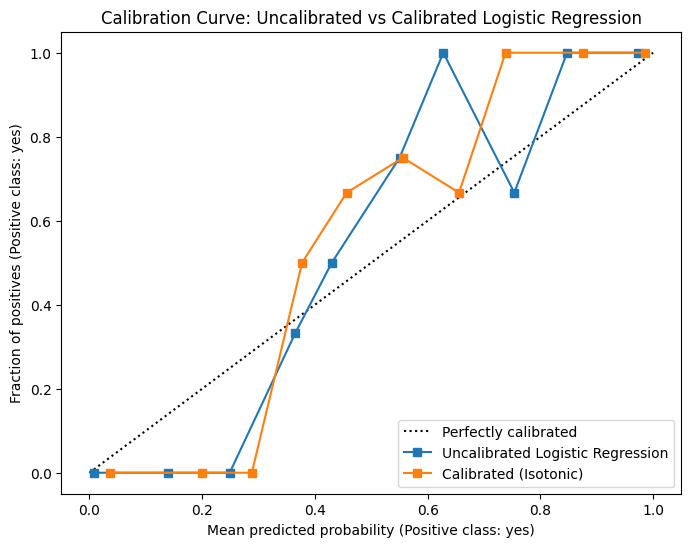

In [ ]:
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Base model
LR_model = LogisticRegression(max_iter=250, C=3)
LR_model.fit(X_train, y_train)

# Calibrated model using isotonic regression
calibrated_model990 = CalibratedClassifierCV(LR_model, method='isotonic', cv=5)
calibrated_model.fit(X_train, y_train)

# Plot setup
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Plot uncalibrated
CalibrationDisplay.from_estimator(
    LR_model,
    X_test,
    y_test,
    n_bins=10,
    name="Uncalibrated Logistic Regression",
    ax=ax,
)

# Plot calibrated
CalibrationDisplay.from_estimator(
    calibrated_model,
    X_test,
    y_test,
    n_bins=10,
    name="Calibrated (Isotonic)",
    ax=ax,
)

plt.title("Calibration Curve: Uncalibrated vs Calibrated Logistic Regression")
plt.show()


In [ ]:
# Plot the accuracy on the training set
import matplotlib.pyplot as plt

# Example data (replace with your actual values)
# e.g., number of estimators or learning rates you tested
param_values = [50, 100, 150, 200]  

# Replace these lists with your actual accuracy results
accuracy_training = [0.85, 0.88, 0.90, 0.91]
accuracy_test = [0.80, 0.83, 0.84, 0.82]

# --- Plot Training Accuracy ---
plt.figure(figsize=(7, 5))
plt.scatter(param_values, accuracy_training, marker="o", color="blue", label="Training Accuracy")
plt.xlim([0, max(param_values) + 10])
plt.ylim([0.0, 1.05])
plt.xlabel("Number of Estimators (or other parameter)")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.title("Effect of Parameter on HGBC Training Accuracy", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# --- Plot Test Accuracy ---
plt.figure(figsize=(7, 5))
plt.scatter(param_values, accuracy_test, marker="s", color="red", label="Test Accuracy")
plt.xlim([0, max(param_values) + 10])
plt.ylim([0.0, 1.05])
plt.xlabel("Number of Estimators (or other parameter)")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.title("Effect of Parameter on HGBC Test Accuracy", fontsize=11)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
# Plot the accuracy on the test set